In [11]:
import os 
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm

In [13]:
def data(dataset_path):
    images = []
    labels = []
    for subfolder in os.listdir(dataset_path):
        subfolder_path = os.path.join(dataset_path, subfolder)
        if not os.path.isdir(subfolder_path):
            continue
        for image_filename in os.listdir(subfolder_path):
            if image_filename.endswith(".jpg"):
                image_path = os.path.join(subfolder_path, image_filename)
                images.append(image_path)
                labels.append(subfolder)
    df = pd.DataFrame({'image': images, 'label': labels})
    return df

In [15]:
train=data('D:\\Downloads IDM\\Compressed\\dataset\\train')
train.head()

,image,label
0,D:\Downloads IDM\Compressed\dataset\train\frac...,fractured
1,D:\Downloads IDM\Compressed\dataset\train\frac...,fractured
2,D:\Downloads IDM\Compressed\dataset\train\frac...,fractured
3,D:\Downloads IDM\Compressed\dataset\train\frac...,fractured
4,D:\Downloads IDM\Compressed\dataset\train\frac...,fractured


In [19]:
#test
test=data('D:\\Downloads IDM\\Compressed\\dataset\\test')
test.head()

,image,label
0,D:\Downloads IDM\Compressed\dataset\test\fract...,fractured
1,D:\Downloads IDM\Compressed\dataset\test\fract...,fractured
2,D:\Downloads IDM\Compressed\dataset\test\fract...,fractured
3,D:\Downloads IDM\Compressed\dataset\test\fract...,fractured
4,D:\Downloads IDM\Compressed\dataset\test\fract...,fractured


In [21]:
val=data('D:\\Downloads IDM\\Compressed\\dataset\\val')
val.head()

,image,label
0,D:\Downloads IDM\Compressed\dataset\val\fractu...,fractured
1,D:\Downloads IDM\Compressed\dataset\val\fractu...,fractured
2,D:\Downloads IDM\Compressed\dataset\val\fractu...,fractured
3,D:\Downloads IDM\Compressed\dataset\val\fractu...,fractured
4,D:\Downloads IDM\Compressed\dataset\val\fractu...,fractured


In [23]:
image_size = (224, 224)
batch_size = 32
datagen = ImageDataGenerator(
    rescale=1./255
)
train_generator = datagen.flow_from_dataframe(
    train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)
test_generator = datagen.flow_from_dataframe(
    test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)
val_generator = datagen.flow_from_dataframe(
    val,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)


Found 4097 validated image filenames belonging to 2 classes.
Found 399 validated image filenames belonging to 2 classes.
Found 404 validated image filenames belonging to 2 classes.


In [25]:
class_num=1
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation=tf.nn.relu,input_shape=(224,224,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2)))  
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation=tf.nn.relu)) 
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2))) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3),activation=tf.nn.relu))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2))) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation=tf.nn.relu))
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Dense(128,activation=tf.nn.relu)) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Dense(class_num,activation=tf.nn.sigmoid))
model.summary()

C:\Users\rishw\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,278,593 (84.99 MB)

 Trainable params: 22,278,145 (84.98 MB)

 Non-trainable params: 448 (1.75 KB)

In [33]:
checkpoint_cb = ModelCheckpoint("my_keras_model.keras", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=5, restore_best_weights=True)
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy',keras.metrics.SpecificityAtSensitivity(0.5),keras.metrics.AUC()])
hist = model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/10


C:\Users\rishw\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 441s 3s/step - accuracy: 0.6583 - auc_2: 0.6930 - loss: 4.7244 - specificity_at_sensitivity_2: 0.7498 - val_accuracy: 0.5842 - val_auc_2: 0.5098 - val_loss: 6.2331 - val_specificity_at_sensitivity_2: 0.0238
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 385s 3s/step - accuracy: 0.8558 - auc_2: 0.8993 - loss: 1.0667 - specificity_at_sensitivity_2: 0.9158 - val_accuracy: 0.6510 - val_auc_2: 0.6340 - val_loss: 3.1922 - val_specificity_at_sensitivity_2: 0.3036
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 369s 3s/step - accuracy: 0.9209 - auc_2: 0.9557 - loss: 0.4815 - specificity_at_sensitivity_2: 0.9748 - val_accuracy: 0.6980 - val_auc_2: 0.7035 - val_loss: 2.4606 - val_specificity_at_sensitivity_2: 0.4286
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 373s 3s/step - accuracy: 0.9312 - auc_2: 0.9659 - loss: 0.3505 - specificity_at_sensitivity_2: 0.9800 - val_accuracy: 0.8069 - val_auc_2: 0.8433 - val_loss: 1.4671 - val_specificity_at_sensitivity_2: 0.6905
Epoch 5/10
129/129 ━━━━

In [35]:
hist_=pd.DataFrame(hist.history)
hist_ 

,accuracy,auc_2,loss,specificity_at_sensitivity_2,val_accuracy,val_auc_2,val_loss,val_specificity_at_sensitivity_2
0,0.731999,0.783014,2.870764,0.846487,0.584158,0.509786,6.233145,0.023810
1,0.870881,0.916317,0.898241,0.931665,0.650990,0.633992,3.192161,0.303571
2,0.922626,0.961397,0.418725,0.975938,0.698020,0.703491,2.460561,0.428571
3,0.939224,0.971824,0.307868,0.980269,0.806931,0.843296,1.467094,0.690476
4,0.957042,0.983486,0.213624,0.986525,0.995049,0.996671,0.030653,0.994048
5,0.968025,0.990871,0.126864,0.993263,0.992574,0.997755,0.039924,1.000000
6,0.976812,0.992587,0.094366,0.993263,1.000000,1.000000,0.004410,1.000000
7,0.974371,0.991724,0.117565,0.994225,0.990099,1.000000,0.018223,1.000000
8,0.978277,0.994288,0.081323,0.994706,0.997525,1.000000,0.005936,1.000000
9,0.979497,0.992771,0.104938,0.994225,0.995049,0.996746,0.022903,0.994048


In [42]:
score, acc,sensitivity,auc = model.evaluate(test_generator)
print('Test Loss =', score)
print('Test Accuracy =', acc)
print('Test Sensitivity =', sensitivity)
print('Test AUC =', auc)

C:\Users\rishw\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9866 - auc_2: 0.5695 - loss: 0.0448 - specificity_at_sensitivity_2: 0.5714
Test Loss = 0.11810080707073212
Test Accuracy = 0.9724310636520386
Test Sensitivity = 1.0
Test AUC = 0.9943844079971313


In [46]:
y_test =test_generator.classes
predictions = model.predict(test_generator)
y_pred = np.where(predictions >= 0.5, 1, 0)
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
df = df["Actual"] != df["Prediction"]

df

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 521ms/step


0      False
1      False
2      False
3      False
4      False
       ...  
394    False
395    False
396    False
397    False
398    False
Length: 399, dtype: bool

array([[198,   1],
       [ 10, 190]], dtype=int64)

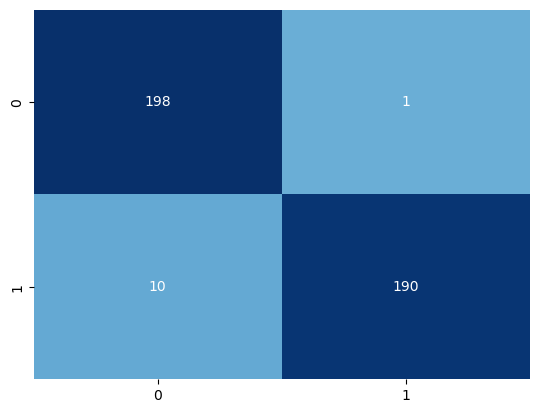

In [48]:
CM = confusion_matrix(y_test,y_pred)
sns.heatmap(CM,fmt='g',center = True,cbar=False,annot=True,cmap='Blues')
CM

In [50]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.95      0.99      0.97       199
           1       0.99      0.95      0.97       200

    accuracy                           0.97       399
   macro avg       0.97      0.97      0.97       399
weighted avg       0.97      0.97      0.97       399



In [52]:
def predict_image(image_path):
    image_size = (224, 224)
    img = cv2.imread(image_path)
    img = cv2.resize(img, image_size)
    img = np.expand_dims(img, axis=0) / 255.0
    prediction = model.predict(img)
    return 'Fractured' if prediction <= 0.5 else 'Not Fractured'


image_path = 'D:\\Downloads IDM\\Compressed\\dataset\\val\\fractured\\1-rotated1-rotated1-rotated3.jpg'
result = predict_image(image_path)
print(f'The image is: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
The image is: Fractured
